In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitch_log.tsv', sep='\t', header=None)
df.tail()

,0,1,2,3,4
180648,펠리칸인디용 (ow_pelican),[Drops] rank,시청자 189명,Overwatch 2,2022-10-10 11:10:04.683222
180649,첨염 (cheomyeom),[DROPS]키리코 스킨 얻는곳! 노방종 ON!!,시청자 186명,Overwatch 2,2022-10-10 11:10:04.683222
180650,보도도 (bododokun),[V]롤드컵 한국팀 같이보기,시청자 185명,Just Chatting,2022-10-10 11:10:04.683222
180651,알송23 (khozzang1),드래곤볼 데바데 대비훈련 70일차 ㅇㅅㅇ,시청자 181명,Dragon Ball: The Breakers,2022-10-10 11:10:04.683222
180652,정예지 (yeji429),지금일어나버린wwwww,시청자 173명,League of Legends,2022-10-10 11:10:04.683222


In [3]:
df.columns = ['이름', '제목','시청자수','카테고리','일시']

### 시청자수 전처리

In [4]:
df['시청자수'] = df['시청자수'].str.replace('시청자 ', '')
df['시청자수'] = df['시청자수'].str.replace('명', '')
df['시청자수'] = df['시청자수'].str.replace(',', '')
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [5]:
df1 = df[df['시청자수'].str.find('만') > 0]
df1

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
49,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:05:04.699268
50,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),1만,Just Chatting,2022-09-27 19:05:04.699268
98,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:10:04.966996
99,한동숙 (handongsuk),발낳대 스크림,1만,VALORANT,2022-09-27 19:10:04.966996
...,...,...,...,...,...
180403,LCK_Korea,2022 월드 챔피언십 Group Stage Day 3,6.3만,League of Legends,2022-10-10 10:50:04.893901
180453,LCK_Korea,2022 월드 챔피언십 Group Stage Day 3,6.6만,League of Legends,2022-10-10 10:55:04.893084
180503,LCK_Korea,2022 월드 챔피언십 Group Stage Day 3,5.9만,League of Legends,2022-10-10 11:00:07.100781
180553,LCK_Korea,2022 월드 챔피언십 Group Stage Day 3,5.9만,League of Legends,2022-10-10 11:05:04.991306


In [6]:
df2 = df1['시청자수'].str.replace('만', '').astype(float)*10000 + 500
df2

0         14500.0
49        14500.0
50        10500.0
98        14500.0
99        10500.0
           ...   
180403    63500.0
180453    66500.0
180503    59500.0
180553    59500.0
180603    62500.0
Name: 시청자수, Length: 5945, dtype: float64

In [7]:
df3 = df['시청자수']
df3 = df3.str.replace(',', '')
# # df[df3.str.find('L')>1]
# df3.iloc[:6687]
# df.iloc[6680:6690]

In [8]:
df.loc[df2.index, '시청자수'] = df2

In [9]:
# df.drop(6684, inplace=True)
df.drop(7190, inplace=True)

In [10]:
df.drop(df[df['시청자수'] == 'League of Legends'].index, inplace=True)
df.drop(df[df['시청자수'].isnull()].index, inplace=True)

In [11]:
df['시청자수'].iloc[7190:7200].astype(float)
df['시청자수']

0         14500.0
1            9687
2            9491
3            8103
4            8098
           ...   
180648        189
180649        186
180650        185
180651        181
180652        173
Name: 시청자수, Length: 180631, dtype: object

In [12]:
df['시청자수'] = df['시청자수'].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180631 entries, 0 to 180652
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   이름      180631 non-null  object
 1   제목      180631 non-null  object
 2   시청자수    180631 non-null  int32 
 3   카테고리    180631 non-null  object
 4   일시      180631 non-null  object
dtypes: int32(1), object(4)
memory usage: 7.6+ MB


In [14]:
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,14500,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [15]:
df1 = df

In [16]:
name = df1.groupby('이름').mean().sort_values('시청자수', ascending=False)[:20]
name

,시청자수
이름,
LCK_Korea,34782.260227
우왁굳 (woowakgood),16873.855708
풍월량 (hanryang1125),15461.711132
enchantenter,15408.673152
한동숙 (handongsuk),14930.466777
아이네_ (vo_ine),14284.519164
침착맨 (zilioner),11396.962963
릴파_ (lilpaaaaaa),11359.882160
valorant_kr,10415.678571


In [17]:
df2 = df1.set_index('이름')
df3 = df2.loc[name.index]
df3

,제목,시청자수,카테고리,일시
이름,,,,
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:00:05.647274
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:05:05.461526
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:10:05.154451
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:15:05.314280
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:20:07.268227
...,...,...,...,...
한갱 (woohankyung),24시간방송 마지막 10부/옵치2 찍먹~~,3789,Overwatch 2,2022-10-09 23:25:04.865188
한갱 (woohankyung),24시간방송 마지막 10부/옵치2 찍먹~~,3748,Overwatch 2,2022-10-09 23:30:04.870860
한갱 (woohankyung),24시간방송 마지막 10부/옵치2 찍먹~~,3822,Just Chatting,2022-10-09 23:35:04.633891


In [18]:
df3.index

Index(['LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       ...
       '한갱 (woohankyung)', '한갱 (woohankyung)', '한갱 (woohankyung)',
       '한갱 (woohankyung)', '한갱 (woohankyung)', '한갱 (woohankyung)',
       '한갱 (woohankyung)', '한갱 (woohankyung)', '한갱 (woohankyung)',
       '한갱 (woohankyung)'],
      dtype='object', name='이름', length=10627)

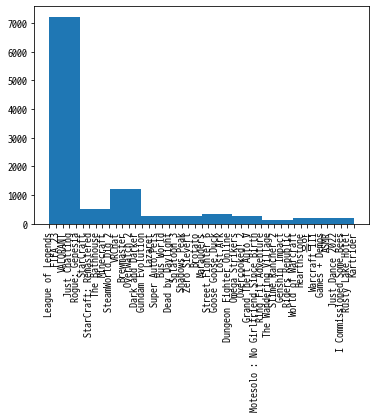

In [19]:
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import rc
rc('font', family='D2Coding')

plt.xticks(rotation="vertical")
plt.hist(df3['카테고리'])
plt.show()

In [20]:
df_p = df[df['이름']=='풍월량 (hanryang1125)']
df_p

,이름,제목,시청자수,카테고리,일시
919,풍월량 (hanryang1125),풍월량,1370,Just Chatting,2022-09-27 20:30:06.475437
968,풍월량 (hanryang1125),풍월량,1487,Just Chatting,2022-09-27 20:35:04.698807
995,풍월량 (hanryang1125),풍월량,5337,Just Chatting,2022-09-27 20:40:04.733223
1045,풍월량 (hanryang1125),풍월량,6279,Just Chatting,2022-09-27 20:45:05.376154
1093,풍월량 (hanryang1125),풍월량,7055,Just Chatting,2022-09-27 20:50:04.643354
...,...,...,...,...,...
175203,풍월량 (hanryang1125),덕몽어스 마피아 게임 풍월량,21500,Goose Goose Duck,2022-10-10 02:05:04.892460
175253,풍월량 (hanryang1125),덕몽어스 마피아 게임 풍월량,21500,Goose Goose Duck,2022-10-10 02:10:05.287657
175303,풍월량 (hanryang1125),덕몽어스 마피아 게임 풍월량,21500,Goose Goose Duck,2022-10-10 02:15:04.893150
175353,풍월량 (hanryang1125),덕몽어스 마피아 게임 풍월량,21500,Goose Goose Duck,2022-10-10 02:20:05.019386


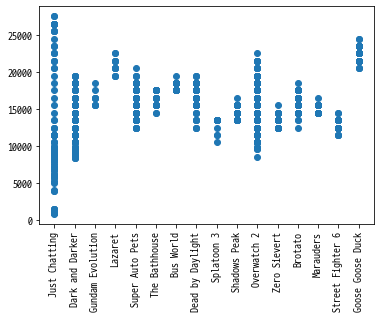

In [21]:
plt.xticks(rotation="vertical")
plt.scatter(df_p['카테고리'], df_p['시청자수'])

(array([241.,  10., 116.,  27., 125.,  29., 305.,  24., 125.,  85.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

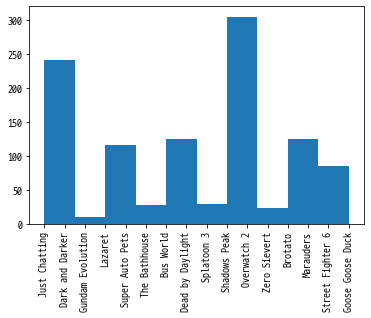

In [22]:
plt.xticks(rotation='vertical')
plt.hist(df_p['카테고리'])

In [23]:
df_p['카테고리'].value_counts()

Overwatch 2         262
Dark and Darker     139
Just Chatting       102
Super Auto Pets     102
Dead by Daylight     89
Brotato              72
Goose Goose Duck     62
Marauders            53
Shadows Peak         43
Bus World            36
Splatoon 3           29
The Bathhouse        27
Zero Sievert         24
Street Fighter 6     23
Lazaret              14
Gundam Evolution     10
Name: 카테고리, dtype: int64

### 시간대별로 집계할 수 있도록 전처리하자